In [59]:
import pandas as pd
import numpy as np
from tensorflow.keras import models,layers
import datetime

First we prepare the data. 
We will:
<br/>-drop all columns wich contain more than 25% nans
<br/>-merge the three dataframes together 
<br/>-linearly interpolate the hourly data to get 15 minute interval data
<br/>-start with year 2016 because that is when the air quality measurements start
<br/>-save this to a dataframe so we can experiment with this set of data

In [8]:
# df_w = pd.read_csv("./weather_data_raw/weather_data_since_2013.csv")

In [9]:
# df_w.drop(df_w.filter(regex="Unname"),axis=1, inplace=True)

In [10]:
# df_w.drop(df_w.filter(regex="station"),axis=1, inplace=True)

In [11]:
# df_w.loc[:,"Date"] = pd.to_datetime(df_w.loc[:,"time"])
# df_w.drop(columns=["time"], inplace=True)

In [12]:
# columns_dropped = []
# for i in df_w:
#     number_nan_rows = df_w.loc[df_w.loc[:,i].isnull(),i].shape[0]
#     percentage_nan_rows = number_nan_rows/df_w.shape[0]*100
#     if (percentage_nan_rows > 25):
#         columns_dropped.append([i,percentage_nan_rows])
#         df_w = df_w.drop(columns=[i])

In [13]:
# df_w.loc[:, df_w.columns != "Date"]  = df_w.drop(columns=["Date"]).astype("float32")

In [14]:
# df_w.shape

(61392, 3181)

In [15]:
# df_w.drop(df_w.filter(regex="dwpt"),axis=1, inplace=True)

In [16]:
# df_w.shape

(61392, 2711)

635.1285705566406

In [18]:
# mask = df_w.loc[:,"Date"] > "2016-01-01 01:00:00"

# df_w = df_w.loc[mask,:]

In [19]:
# df_energy = pd.read_csv("Complete_daily_data.csv",parse_dates=[0])
# df_energy = df_energy.loc[:,['Date', 'System total load in MAW',
#        'Wind Offshore in MAW', 'Wind Onshore in MAW', 'Solar in MAW',
#        'predicted_Wind Offshore in MAW', 'predicted_Wind Onshore in MAW',
#        'predicted_System total load in MAW', 'predicted_Solar in MAW']] 

In [20]:
# df_merge = pd.merge(df_w,df_energy,on=['Date'], how='outer')

In [21]:
# df_merge = df_merge.sort_values(by="Date")

In [22]:
# mask = df_merge.loc[:,"Date"] > "2016-01-01 01:00:00"

# df_merge = df_merge.loc[mask,:]

In [23]:
# df_merge = df_merge.sort_values(by="Date")

In [24]:
# df_merge.interpolate(method='linear', inplace=True)

In [25]:
# df_aq = pd.read_csv("air_quality.csv",parse_dates=[0])

In [26]:
# df_complete = pd.merge(df_merge,df_aq,on=['Date'], how='outer')

In [27]:
# df_complete = df_complete.sort_values(by="Date")

In [28]:
# df_complete.interpolate(method='linear', inplace=True)

In [29]:
# df = df_complete

In [30]:
# df = df.dropna()

In [31]:
# df["Year"] = df["Date"].dt.year
# df["Month"] = df["Date"].dt.month
# df["Week"] = df["Date"].dt.week
# df["Weekday"] = df["Date"].dt.dayofweek
# df["Hour"] = df["Date"].dt.hour

/home/tjarke/anaconda3/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/tjarke/anaconda3/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/tjarke/anaconda3/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isoca

In [34]:
# cols = df.columns

In [41]:
# rearrange = []
# for i in cols:
#     if i == "Date":
#         rearrange.insert(0, "Date")
#     else:
#         rearrange.append(i)
# df = df[rearrange]

In [43]:
# df.to_csv("all_stations_start_2016.csv",index=False)

In [44]:
# getsizeof(df)/1024/1024

2603.093292236328

NameError: name 'asd' is not defined

Now we load the prepared data. Then we:
<br/>-add a new row in wich we add the naive values from the timestep before
<br/>-define our target and split in train/val/test set
<br/>-scale our input data
<br/>-change the data type of the columns
<br/>-make a sequence out of our data, in this case the past 3 values are taken into consideration
<br/>-build the model architecture
<br/>-look at the training history
<br/>-evaluate our model 
<br/>-print out entso-e s result

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import models,layers
import datetime
from utils import train_val_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from utils import get_model_metrics

In [33]:
df = pd.read_csv("all_stations_start_2016.csv",parse_dates=[0])

In [34]:
mask = df.loc[:,"Date"] > "2019-01-01 01:00:00"

df= df.loc[mask,:]

In [35]:
target_vars = ["System total load in MAW","Wind Offshore in MAW","Wind Onshore in MAW","Solar in MAW"]

In [36]:
df[["naive_System total load in MAW","naive_Wind Offshore in MAW","naive_Wind Onshore in MAW","naive_Solar in MAW"]]=df.loc[:,target_vars].shift(periods=1)

In [37]:
df.dropna(inplace=True)

In [38]:
target_vars = ["System total load in MAW","Wind Offshore in MAW","Wind Onshore in MAW","Solar in MAW"]
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df, target_vars, 90, 90)

The shape of the data set is: (63762, 3702)

--------------------------------------------
The shape of the train set is: (46482, 3697)
The shape of the target variable is: (46482, 4)
--------------------------------------------

--------------------------------------------
The shape of the validation set is: (8640, 3697)
The shape of the target variable for the validation set is: (8640, 4)
--------------------------------------------

--------------------------------------------
The shape of the test set is: (8640, 3697)
The shape of the target variable for the test set is: (8640, 5)
--------------------------------------------


In [39]:
scaler_f = StandardScaler()
X_train = scaler_f.fit_transform(X_train)
X_val = scaler_f.transform(X_val)
X_test = scaler_f.transform(X_test)

In [40]:
X_train = X_train.astype("float32")
X_val = X_val.astype("float32")
X_test = X_test.astype("float32")

In [41]:
# split a multivariate sequence into samples
def split_sequences(features,target, n_steps):
    X, y = list(), list()
    for i in range(len(target)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(target):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = features[i:end_ix, :], target.iloc[end_ix-1,:]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [42]:
n_steps = 3
n_features = X_train.shape[1]

In [43]:
X_train, y_train = split_sequences(X_train,y_train, n_steps)
X_val, y_val = split_sequences(X_val,y_val, n_steps)

In [13]:
X_train.shape

(46480, 3, 3697)

In [14]:
from sys import getsizeof
getsizeof(X_train)/1024/1024

1966.5134887695312

In [16]:
model = models.Sequential()
model.add(layers.LSTM(250, activation='relu', input_shape=(n_steps, n_features)))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dense(4, activation = "relu"))
model.summary()



model.compile(
    optimizer = "rmsprop",
    loss = "mean_squared_error",
    metrics = ["mean_absolute_error"]#optional
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 250)               3948000   
_________________________________________________________________
dense (Dense)                (None, 50)                12550     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 204       
Total params: 3,960,754
Trainable params: 3,960,754
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(
    X_train,y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val,y_val),
    shuffle=False
    )

Epoch 1/40
1453/1453 [==============================] - 19s 13ms/step - loss: 801516.1875 - mean_absolute_error: 585.3746 - val_loss: 18488330.0000 - val_mean_absolute_error: 2434.1748
Epoch 2/40
1453/1453 [==============================] - 18s 13ms/step - loss: 792702.1875 - mean_absolute_error: 585.4166 - val_loss: 13537781.0000 - val_mean_absolute_error: 2069.0652
Epoch 3/40
1453/1453 [==============================] - 19s 13ms/step - loss: 788047.2500 - mean_absolute_error: 582.3649 - val_loss: 15646899.0000 - val_mean_absolute_error: 2242.3340
Epoch 4/40
1453/1453 [==============================] - 20s 13ms/step - loss: 790026.8125 - mean_absolute_error: 583.2117 - val_loss: 12895647.0000 - val_mean_absolute_error: 2053.0723
Epoch 5/40
1453/1453 [==============================] - 21s 15ms/step - loss: 762852.6875 - mean_absolute_error: 577.5912 - val_loss: 14874889.0000 - val_mean_absolute_error: 2177.2131
Epoch 6/40
1453/1453 [==============================] - 23s 16ms/step - los

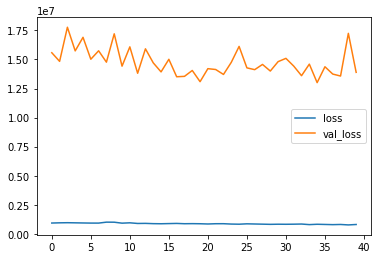

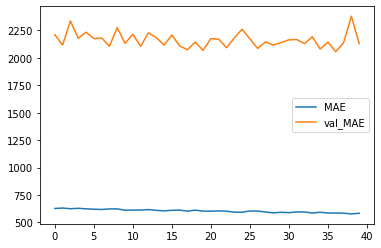

In [29]:
history.history
plt.plot(history.history["loss"],label = "loss")
plt.plot(history.history["val_loss"],label = "val_loss")
plt.legend()
plt.show()
plt.close()


history.history
plt.plot(history.history["mean_absolute_error"],label = "MAE")
plt.plot(history.history["val_mean_absolute_error"],label = "val_MAE")
plt.legend()
plt.show()
plt.close()

In [44]:
X_test, _ = split_sequences(X_test,y_test.iloc[:,:-1], n_steps)

In [45]:
y_pred = model.predict(X_test)

In [46]:

list_entso = ["predicted_System total load in MAW", "predicted_Wind Offshore in MAW", "predicted_Wind Onshore in MAW",  "predicted_Solar in MAW"]
_, _, _, _, _, y_entso = train_val_test_split(df, list_entso, 90, 90)
y_entso_e = y_entso.iloc[:,[0,1,2,3]].to_numpy()

The shape of the data set is: (63762, 3702)

--------------------------------------------
The shape of the train set is: (46482, 3697)
The shape of the target variable is: (46482, 4)
--------------------------------------------

--------------------------------------------
The shape of the validation set is: (8640, 3697)
The shape of the target variable for the validation set is: (8640, 4)
--------------------------------------------

--------------------------------------------
The shape of the test set is: (8640, 3697)
The shape of the target variable for the test set is: (8640, 5)
--------------------------------------------


In [48]:
y_test

,System total load in MAW,Wind Offshore in MAW,Wind Onshore in MAW,Solar in MAW,Date
136920,58592.0,5473.0,14076.0,7037.0,2020-07-28 06:00:00
136921,59392.0,5461.0,13960.0,8428.0,2020-07-28 06:15:00
136922,59978.0,5299.0,14083.0,9929.0,2020-07-28 06:30:00
136923,60262.0,5354.0,14472.0,11355.0,2020-07-28 06:45:00
136924,60758.0,5196.0,14743.0,12845.0,2020-07-28 07:00:00
...,...,...,...,...,...
145555,41363.0,4569.0,9416.0,0.0,2020-10-26 19:00:00
145556,41363.0,4569.0,9416.0,0.0,2020-10-26 20:00:00
145557,41363.0,4569.0,9416.0,0.0,2020-10-26 21:00:00
145558,41363.0,4569.0,9416.0,0.0,2020-10-26 22:00:00


array([[68264.516 ,  5173.9375, 16281.208 , 13707.607 ],
       [67303.69  ,  5052.711 , 16270.776 , 14367.791 ],
       [66668.875 ,  4903.6406, 16419.764 , 14985.337 ],
       ...,
       [39665.008 ,  4121.218 , 12219.583 ,     0.    ],
       [39314.19  ,  4387.7207, 13339.481 ,     0.    ],
       [39533.957 ,  4488.1064, 13563.02  ,   158.148 ]], dtype=float32)

In [51]:
list_names = ["Load","Wind Offshore", "Wind Onshore", "Solar"]

for i in range(len(y_pred[0])):
    print("=================================")
    print(f"{list_names[i]}")
    get_model_metrics(y_test.iloc[2:,[-1,i]],y_pred[:,i])
    print("=================================")


Load
----------------------------------------------
The overall mean absolute error of the model in MW is: 4943.8
----------------------------------------------
----------------------------------------------
The overall mean absolute scaled error of the model in MW is: 9.3922
Please note: to calculate the MASE, the prediction for the first observation was omitted
----------------------------------------------
Wind Offshore
----------------------------------------------
The overall mean absolute error of the model in MW is: 866.72
----------------------------------------------
----------------------------------------------
The overall mean absolute scaled error of the model in MW is: 10.0299
Please note: to calculate the MASE, the prediction for the first observation was omitted
----------------------------------------------
Wind Onshore
----------------------------------------------
The overall mean absolute error of the model in MW is: 1693.45
-----------------------------------------

In [52]:
list_names = ["Load","Wind Offshore", "Wind Onshore", "Solar"]

for i in range(len(y_pred[0])):
    print("=================================")
    print(f"{list_names[i]}")
    get_model_metrics(y_test.iloc[:,[-1,i]],y_entso_e[:,i])
    print("=================================")


Load
----------------------------------------------
The overall mean absolute error of the model in MW is: 1399.12
----------------------------------------------
----------------------------------------------
The overall mean absolute scaled error of the model in MW is: 2.6583
Please note: to calculate the MASE, the prediction for the first observation was omitted
----------------------------------------------
Wind Offshore
----------------------------------------------
The overall mean absolute error of the model in MW is: 463.8
----------------------------------------------
----------------------------------------------
The overall mean absolute scaled error of the model in MW is: 5.3665
Please note: to calculate the MASE, the prediction for the first observation was omitted
----------------------------------------------
Wind Onshore
----------------------------------------------
The overall mean absolute error of the model in MW is: 917.72
-------------------------------------------

In [ ]:
list_names = ["Load","Wind Offshore", "Wind Onshore", "Solar"]

for i in range(len(y_pred[0])):
    print("=================================")
    print(f"{list_names[i]}")
    get_model_metrics(y_test.iloc[1:,[-1,i]],y_test.iloc[:-1,i])
    print("=================================")